# Pandas


Pandas (Panel Datasets) is a data science Python library to load, clean, transform and analyze datasets.  
Pandas uses `numpy` internally for the numeric calculation.  

Pandas is installed with : `pip install pandas`

A dataset is represented by a `DataFrame`, a 2-dimension array with named columns.  
A `Series` is a 1-dimension array of data, used to represent a column or a row.  


## Dataframe creation

Dataframes can be created from :
- a python dict object (each key of the dict is a column of the dataframe)
- some pandas column series
- a file (CSV, TSV, JSON, Excel)
- a database table or SQL query

In [1]:
import pandas as pd

# Create a test dataframe from a dict
data = {
    'orderRef': ['A001', 'A007', 'A010', 'A011'],
    'client':   ['Bob', 'Alice', 'Bob', 'John'],
    'apples':   [3, 2, 0, 1], 
    'oranges':  [0, 3, 7, 2]
}
df = pd.DataFrame(data)
df = df.set_index('orderRef')   # we can set a column of the dataframe as the index
df

,client,apples,oranges
orderRef,,,
A001,Bob,3,0
A007,Alice,2,3
A010,Bob,0,7
A011,John,1,2


In [2]:
# display the row with a given index as a Series
df.loc['A010']

client     Bob
apples       0
oranges      7
Name: A010, dtype: object

In [3]:
# display the column with a given name as a Series
df['apples']
df.apples          # equivalent syntax (only work when there is no space in the name)

orderRef
A001    3
A007    2
A010    0
A011    1
Name: apples, dtype: int64

In [4]:
# Create a dataframe from several column series
col1 = pd.Series({'A001': 'Bob', 'A007': 'Alice', 'A010': 'Bob', 'A011': 'John'}, name='client')
col2 = pd.Series({'A001': 3, 'A007': 2, 'A010': 0, 'A011': 1}, name='apples')
col3 = pd.Series({'A001': 0, 'A007': 3, 'A010': 7, 'A011': 2}, name='oranges')
pd.concat([col1, col2, col3], axis='columns', sort=False)

,client,apples,oranges
A001,Bob,3,0
A007,Alice,2,3
A010,Bob,0,7
A011,John,1,2


In [5]:
# Import a dataset from a CSV file
# if the CSV has no header, pass the "names" array parameters with column names
# if the CSV has some values to treat as NaN (like 'Missing' or 'N/A' strings), use na_values param
df = pd.read_csv('data/purchases.csv', index_col="orderRef")
df

,client,apples,oranges
orderRef,,,
A001,Bob,3,0
A007,Alice,2,3
A010,Bob,0,7
A011,John,1,2


In [6]:
# Export to CSV / TSV / Excel / JSON
df.to_csv('new_purchases.csv')
df.to_csv('new_purchases.tsv', sep='\t')
df.to_excel('new_purchases.xlsx')            # require module openpyxl installed
df.to_json('new_purchases.json')

# Also possible to export to a DB via SQL (need to install SQLAchemy and the package for our SQL DB)
from sqlalchemy import create_engine
import psycopg2                        # Python module for PostgreSQL
db_user           = 'dbuser'
db_password       = 'dbpassword'
db_server         = 'localhost'
db_port           = 5432
db_name           = 'sampledb'
db_connection_url = f'postgresql://{db_user}:{db_password}@{db_server}:{db_port}/{db_name}'
engine = create_engine(db_connection_url)
# df.to_sql('sample_table', engine, if_exists='replace')          # should work when using a real DB

## Dataset overview

In [7]:
# load a dataframe
df = pd.read_csv("data/IMDB-Movie-Data.csv", index_col="Title")

# print 5 first rows
df.head()

# print last 3 rows
df.tail(3)

,Rank,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Title,,,,,,,,,,,
Step Up 2: The Streets,998,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0
Search Party,999,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,NaN,22.0
Nine Lives,1000,"Comedy,Family,Fantasy",A stuffy businessman finds himself trapped ins...,Barry Sonnenfeld,"Kevin Spacey, Jennifer Garner, Robbie Amell,Ch...",2016,87,5.3,12435,19.64,11.0


In [8]:
# number of rows and columns
df.shape

(1000, 11)

In [9]:
# data type of each column
df.dtypes

Rank                    int64
Genre                  object
Description            object
Director               object
Actors                 object
Year                    int64
Runtime (Minutes)       int64
Rating                float64
Votes                   int64
Revenue (Millions)    float64
Metascore             float64
dtype: object

In [10]:
# list of the column names
df.columns

Index(['Rank', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [11]:
# row counts, non-null values for each column, column types, memory used...
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, Guardians of the Galaxy to Nine Lives
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Genre               1000 non-null   object 
 2   Description         1000 non-null   object 
 3   Director            1000 non-null   object 
 4   Actors              1000 non-null   object 
 5   Year                1000 non-null   int64  
 6   Runtime (Minutes)   1000 non-null   int64  
 7   Rating              1000 non-null   float64
 8   Votes               1000 non-null   int64  
 9   Revenue (Millions)  872 non-null    float64
 10  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(4)
memory usage: 93.8+ KB


## Slicing / Selecting / Extracting

In [12]:
# Select on columns
df['Rank']              # Series (rank column)
df[['Rank', 'Year']]    # DataFrame (sub-dataframe with 2 columns)
df[['Rank']]            # DataFrame (sub-dataframe with 1 column)

# Select on rows by index column
df.loc['Split']                                    # Series (row with "Split" title)
df.loc[['Split', 'Inception']]                     # Dataframe (rows with "Split" and 'Inception' index)
df.loc[['Split', 'Inception'], ['Rank', 'Genre']]  # Dataframe (rank and genre cols of rows "Split" and 'Inception')
df.loc['Split', 'Rank':'Rating']                   # Series (all cols from rank to rating for row "Split")

# Select on rows by integer index position
df.iloc[2]              # Series (3rd row)
df.iloc[[0, 2]]         # Dataframe (1st and 3rd row)
df.iloc[2:5]            # Sliced DataFrame (rows i to j excluded)
df.iloc[[0, 2], 2]      # Series (column 2 for rows 0 and 2)

# Filter rows on a condition on a column
# Note : Pandas filters use &/|/~ instead of and/or/not   
df[df['Rating'] > 8.5]
df[(df['Rating'] > 8.5) | (df['Rating'] < 3)]
df[(df['Rating'] > 8.5) & (df['Director'] == 'Christopher Nolan')]
df[~(df['Director'] == 'Christopher Nolan')]

# We can also pass the filter to the df.loc[] instead :
df.loc[df['Rating'] > 8.5]        # equivalent to : df[df['rating'] > 8.5] 

# Filter rows on a regex on a column
df.loc[df['Director'].str.contains('Nolan|Burton', regex=True)]

,Rank,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Title,,,,,,,,,,,
Interstellar,37,"Adventure,Drama,Sci-Fi",A team of explorers travel through a wormhole ...,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",2014,169,8.6,1047747,187.99,74.0
The Dark Knight,55,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0
The Prestige,65,"Drama,Mystery,Sci-Fi",Two stage magicians engage in competitive one-...,Christopher Nolan,"Christian Bale, Hugh Jackman, Scarlett Johanss...",2006,130,8.5,913152,53.08,66.0
Inception,81,"Action,Adventure,Sci-Fi","A thief, who steals corporate secrets through ...",Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",2010,148,8.8,1583625,292.57,74.0
Miss Peregrine's Home for Peculiar Children,121,"Adventure,Drama,Family",When Jacob discovers clues to a mystery that s...,Tim Burton,"Eva Green, Asa Butterfield, Samuel L. Jackson,...",2016,127,6.7,101058,87.24,57.0
The Dark Knight Rises,125,"Action,Thriller",Eight years after the Joker's reign of anarchy...,Christopher Nolan,"Christian Bale, Tom Hardy, Anne Hathaway,Gary ...",2012,164,8.5,1222645,448.13,78.0
Alice in Wonderland,548,"Adventure,Family,Fantasy",Nineteen-year-old Alice returns to the magical...,Tim Burton,"Mia Wasikowska, Johnny Depp, Helena Bonham Car...",2010,108,6.5,324898,334.19,53.0
Sweeney Todd: The Demon Barber of Fleet Street,651,"Drama,Horror,Musical","The infamous story of Benjamin Barker, a.k.a. ...",Tim Burton,"Johnny Depp, Helena Bonham Carter, Alan Rickma...",2007,116,7.4,296289,52.88,83.0
Dark Shadows,726,"Comedy,Fantasy,Horror","An imprisoned vampire, Barnabas Collins, is se...",Tim Burton,"Johnny Depp, Michelle Pfeiffer, Eva Green, Hel...",2012,113,6.2,209326,79.71,55.0


## Add/Update/Delete columns and rows

#### Add rows

In [13]:
# Add a Series with df.loc[]
new_row = pd.Series({'Genre': 'Thriller', 'Director': 'John Doe', 'Rating': 5.2})
df.loc['My Movie 2'] = new_row

# Concatenate 2 dataframes
df2 = pd.DataFrame({
    'Title'    : ['My Movie 3', 'My Movie 4'],
    'Genre'    : ['Love Story', 'Thriller'],
    'Director' : ['John Doe', 'John Doe'],
    'Rating'   : [3.2, 7.2] 
})
df2.set_index('Title', inplace=True)
df = pd.concat([df, df2])

df.tail()

,Rank,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Title,,,,,,,,,,,
Search Party,999.0,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014.0,93.0,5.6,4881.0,NaN,22.0
Nine Lives,1000.0,"Comedy,Family,Fantasy",A stuffy businessman finds himself trapped ins...,Barry Sonnenfeld,"Kevin Spacey, Jennifer Garner, Robbie Amell,Ch...",2016.0,87.0,5.3,12435.0,19.64,11.0
My Movie 2,NaN,Thriller,NaN,John Doe,NaN,NaN,NaN,5.2,NaN,NaN,NaN
My Movie 3,NaN,Love Story,NaN,John Doe,NaN,NaN,NaN,3.2,NaN,NaN,NaN
My Movie 4,NaN,Thriller,NaN,John Doe,NaN,NaN,NaN,7.2,NaN,NaN,NaN


#### Update rows

In [14]:
# Replace an entire row (similar to row creation)
df.loc['Split'] = pd.Series({
    'Rank': 3,
    'Year': 2015,
    'Director': 'M. Night Shyamalan',
    'Description': 'Good Movie',
    'Rating': 7.2
})

# Replace a column for a specific row
df.loc['Split', 'Genre'] = 'Action'
df.at['Split', 'Genre'] = 'Action'     # equivalent syntax

# Modify the value of several columns for a given row in the dataframe
df.loc['Split', ['Genre', 'Rating']] = ['Thriller', 7.3]

# Modify the value of a column for several rows in the dataframe using a row filter
bad_rating_filter = df['Rating'] < 7.0
df.loc[bad_rating_filter, 'Metascore'] = 0.0

df.head()

,Rank,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Title,,,,,,,,,,,
Guardians of the Galaxy,1.0,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014.0,121.0,8.1,757074.0,333.13,76.0
Prometheus,2.0,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012.0,124.0,7.0,485820.0,126.46,65.0
Split,3.0,Thriller,Good Movie,M. Night Shyamalan,NaN,2015.0,NaN,7.3,NaN,NaN,NaN
Sing,4.0,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016.0,108.0,7.2,60545.0,270.32,59.0
Suicide Squad,5.0,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016.0,123.0,6.2,393727.0,325.02,0.0


#### Delete rows

In [15]:
# Drop a row by index
df = df.drop(index=['My Movie 2'])
df.drop('Nine Lives', inplace=True)        # equivalent syntax

# Drop rows by condition
my_filter = df.index.str.startswith('My ')
df.drop(index=df[my_filter].index, inplace=True)

df.tail(3)

,Rank,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Title,,,,,,,,,,,
Hostel: Part II,997.0,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007.0,94.0,5.5,73152.0,17.54,0.0
Step Up 2: The Streets,998.0,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008.0,98.0,6.2,70699.0,58.01,0.0
Search Party,999.0,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014.0,93.0,5.6,4881.0,NaN,0.0


#### Add columns

In [16]:
# Add a column to the dataframe by combining some columns
df['ref'] = df['Year'].astype(str).str[:4] + '-' + df.index.str.replace(' ', '-')

# Add a new column to the df by applying a function to another column
def get_grade(rating):
    if rating > 8:
        return 'S'
    elif rating > 7:
        return 'A'
    elif rating > 6:
        return 'B'
    else:
        return 'C'
    
df['Grade'] = df['Rating'].apply(get_grade)

df.head(3)

,Rank,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,ref,Grade
Title,,,,,,,,,,,,,
Guardians of the Galaxy,1.0,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014.0,121.0,8.1,757074.0,333.13,76.0,2014-Guardians-of-the-Galaxy,S
Prometheus,2.0,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012.0,124.0,7.0,485820.0,126.46,65.0,2012-Prometheus,B
Split,3.0,Thriller,Good Movie,M. Night Shyamalan,NaN,2015.0,NaN,7.3,NaN,NaN,NaN,2015-Split,A


#### Update columns

In [17]:
# Rename some column names
df.rename(columns={
    "Runtime (Minutes)": "Runtime",
    "Revenue (Millions)": "Revenue"
}, inplace=True)

# Rename all column names
df.columns = [col.lower() for col in df.columns]

# We can also use the str attributes to use StringMethods on the columns index to rename the columns
df.columns = df.columns.str.replace(' ', '_')

# Update all cells in a single column using some StringMethods
df['genre'] = df['genre'].str.lower()

# Replace the genre column by applying the function to all its cells (similar to column creation)
df['genre'] = df['genre'].apply(lambda x: x.replace(',', '/'))  

# Replace column specific values with some given values
# "replace" only modifies the specified values, while "map" replaces all others by NaN
df['director'].map(    {'M. Night Shyamalan': 'Night Shymalan'})    # All other directors become NaN
df['director'].replace({'M. Night Shyamalan': 'Night Shymalan'})    # All other directors are unchanged

df.head()

,rank,genre,description,director,actors,year,runtime,rating,votes,revenue,metascore,ref,grade
Title,,,,,,,,,,,,,
Guardians of the Galaxy,1.0,action/adventure/sci-fi,A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014.0,121.0,8.1,757074.0,333.13,76.0,2014-Guardians-of-the-Galaxy,S
Prometheus,2.0,adventure/mystery/sci-fi,"Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012.0,124.0,7.0,485820.0,126.46,65.0,2012-Prometheus,B
Split,3.0,thriller,Good Movie,M. Night Shyamalan,NaN,2015.0,NaN,7.3,NaN,NaN,NaN,2015-Split,A
Sing,4.0,animation/comedy/family,"In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016.0,108.0,7.2,60545.0,270.32,59.0,2016-Sing,A
Suicide Squad,5.0,action/adventure/fantasy,A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016.0,123.0,6.2,393727.0,325.02,0.0,2016-Suicide-Squad,B


In [18]:
# Practical example of manipulation of a column on the "director" column :
#   - keep only the last 2 words of the director name
#   - drop rows with a director name with a single word
#   - create a column for the first name and a column for the last name of the director

# Find all rows with a director with a name in more than 2 words
name_filter = df['director'].str.split().apply(len) > 2
df[name_filter]

# Keep only the last 2 words of director names
df['director'] = df['director'].str.split().apply(lambda l: ' '.join(l[-2:]))

# Drop all rows with a director name with a single word (McG)
name_filter = df['director'].str.split(' ').apply(len) == 1
df.drop(df[name_filter].index, inplace=True)

# Make a column for first name and a column for last name
# split() returns one Series with a value equal to the list of tokens
# with the expand flag, it splits instead into multiple Series (one Serie per token)
df[['dir_first_name','dir_last_name']] = df['director'].str.split(' ', expand=True)

df.head()

,rank,genre,description,director,actors,year,runtime,rating,votes,revenue,metascore,ref,grade,dir_first_name,dir_last_name
Title,,,,,,,,,,,,,,,
Guardians of the Galaxy,1.0,action/adventure/sci-fi,A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014.0,121.0,8.1,757074.0,333.13,76.0,2014-Guardians-of-the-Galaxy,S,James,Gunn
Prometheus,2.0,adventure/mystery/sci-fi,"Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012.0,124.0,7.0,485820.0,126.46,65.0,2012-Prometheus,B,Ridley,Scott
Split,3.0,thriller,Good Movie,Night Shyamalan,NaN,2015.0,NaN,7.3,NaN,NaN,NaN,2015-Split,A,Night,Shyamalan
Sing,4.0,animation/comedy/family,"In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016.0,108.0,7.2,60545.0,270.32,59.0,2016-Sing,A,Christophe,Lourdelet
Suicide Squad,5.0,action/adventure/fantasy,A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016.0,123.0,6.2,393727.0,325.02,0.0,2016-Suicide-Squad,B,David,Ayer


#### Delete columns

In [19]:
# Delete a column from a df and return a new df
df.drop(columns=['actors'])

# Delete a column from a df and returns it as a Series
df.pop('actors')

Title
Guardians of the Galaxy    Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...
Prometheus                 Noomi Rapace, Logan Marshall-Green, Michael Fa...
Split                                                                    NaN
Sing                       Matthew McConaughey,Reese Witherspoon, Seth Ma...
Suicide Squad              Will Smith, Jared Leto, Margot Robbie, Viola D...
                                                 ...                        
Project X                  Thomas Mann, Oliver Cooper, Jonathan Daniel Br...
Secret in Their Eyes       Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...
Hostel: Part II            Lauren German, Heather Matarazzo, Bijou Philli...
Step Up 2: The Streets     Robert Hoffman, Briana Evigan, Cassie Ventura,...
Search Party               Adam Pally, T.J. Miller, Thomas Middleditch,Sh...
Name: actors, Length: 995, dtype: object

## Dealing with Null data

Some rows may have some missing values for some columns.  
There are 2 ways to address it :
- remove the lines with missing data (if just a small number)
- fill the missing values with a default value (usually mean or median of the series)

In [20]:
# dataframe of boolean saying if the cell is null (None or NaN)
null_matrix = df.isnull()
null_matrix = df.isna()          # synonym method

# number of null for each column
df.isnull().sum()

rank                0
genre               0
description         0
director            0
year                0
runtime             1
rating              0
votes               1
revenue           129
metascore          30
ref                 0
grade               0
dir_first_name      0
dir_last_name       0
dtype: int64

In [21]:
# drop rows with at least one null value (in a new dataframe, use inplace param to update the original)
df2 = df.dropna()

# drop columns with at least one null value
df3 = df.dropna(axis='columns')

# drop rows with at least one null value in some specific columns
df4 = df.dropna(subset=['revenue'])

In [22]:
# replace null values by a given value
revenue_median = df['revenue'].median()
df['revenue'].fillna(revenue_median, inplace=True)

score_mean = df['metascore'].mean()
df['metascore'].fillna(score_mean, inplace=True)

In [23]:
# duplicate all rows of the dataset
tmp = pd.concat([df, df])
tmp.shape

(1990, 14)

In [24]:
# Remove duplicate rows
tmp.drop_duplicates(inplace=True, keep="first")  # first / last / False (drop them all)
tmp.shape

(995, 14)

## Casting column to a different type

In [25]:
# Cast the year into an int type
# If the data has rows with NaN values, we must drop them or cast to float instead (as NaN is a float)
df.dropna(subset=['year'], inplace=True)
df['year'] = df['year'].astype(int)
df.dtypes

rank              float64
genre              object
description        object
director           object
year                int32
runtime           float64
rating            float64
votes             float64
revenue           float64
metascore         float64
ref                object
grade              object
dir_first_name     object
dir_last_name      object
dtype: object

## Data exploration

### Dataframe level statistics

In [26]:
# individual statistic indicators on all numeric columns
df.median(numeric_only=True)
df.max(numeric_only=True)
df.mean(numeric_only=True)

rank            498.446231
year           2012.778894
runtime         113.218310
rating            6.726432
votes        170112.865191
revenue          78.471643
metascore        30.192746
dtype: float64

In [27]:
# statistics on each numeric column (count, mean, std, min/max...)
df.describe()

,rank,year,runtime,rating,votes,revenue,metascore
count,995.000000,995.000000,994.000000,995.000000,9.940000e+02,995.000000,995.000000
mean,498.446231,2012.778894,113.218310,6.726432,1.701129e+05,78.471643,30.192746
std,288.009676,3.207348,18.835847,0.946196,1.891382e+05,97.309209,35.258033
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,0.000000
25%,249.500000,2010.000000,100.000000,6.200000,3.631450e+04,17.270000,0.000000
50%,498.000000,2014.000000,111.000000,6.800000,1.107990e+05,47.825000,0.000000
75%,746.500000,2016.000000,123.000000,7.400000,2.401852e+05,98.280000,68.000000
max,999.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


In [28]:
# Check the correlation between columns
# Correlation are in [-1, 1] :
#   ->  1 means if one goes up the other too
#   -> -1 means if one goes up the other goes down
#   ->  0 means no correlation
#   -> no real correlation if |corr| < 0.5
df.corr(numeric_only=True)

,rank,year,runtime,rating,votes,revenue,metascore
rank,1.000000,-0.265352,-0.219109,-0.215739,-0.283399,-0.257779,-0.236823
year,-0.265352,1.000000,-0.163426,-0.209969,-0.410606,-0.146443,-0.167676
runtime,-0.219109,-0.163426,1.000000,0.390481,0.406199,0.272452,0.337285
rating,-0.215739,-0.209969,0.390481,1.000000,0.510965,0.217124,0.759149
votes,-0.283399,-0.410606,0.406199,0.510965,1.000000,0.638735,0.465544
revenue,-0.257779,-0.146443,0.272452,0.217124,0.638735,1.000000,0.210924
metascore,-0.236823,-0.167676,0.337285,0.759149,0.465544,0.210924,1.000000


#### Column-level statistics

In [29]:
# individual statistics indicators
df['rating'].mean()
df['rating'].median()
df['rating'].min()
df['rating'].max()
df['rating'].unique()                      # list of distinct values
df['rating'].count()                       # number of non-null values
df['rating'].value_counts()                # number of occurences of each unique value
df['rating'].value_counts(normalize=True)  # freq of occurences of each unique value

# describe() on a numerical column gives statistics (count/mean/min/max...)
df['rating'].describe()

count    995.000000
mean       6.726432
std        0.946196
min        1.900000
25%        6.200000
50%        6.800000
75%        7.400000
max        9.000000
Name: rating, dtype: float64

In [30]:
# describe() on a categorical column gives count/unique/top...
df['genre'].describe()

count                         995
unique                        205
top       action/adventure/sci-fi
freq                           50
Name: genre, dtype: object

In [31]:
# N largest values of a column
df['revenue'].nlargest(3)

# N rows with largest value for a given column
df.nlargest(3, 'revenue')

,rank,genre,description,director,year,runtime,rating,votes,revenue,metascore,ref,grade,dir_first_name,dir_last_name
Title,,,,,,,,,,,,,,
Star Wars: Episode VII - The Force Awakens,51.0,action/adventure/fantasy,Three decades after the defeat of the Galactic...,J.J. Abrams,2015,136.0,8.1,661608.0,936.63,81.0,2015-Star-Wars:-Episode-VII---The-Force-Awakens,S,J.J.,Abrams
Avatar,88.0,action/adventure/fantasy,A paraplegic marine dispatched to the moon Pan...,James Cameron,2009,162.0,7.8,935408.0,760.51,83.0,2009-Avatar,A,James,Cameron
Jurassic World,86.0,action/adventure/sci-fi,"A new theme park, built on the original site o...",Colin Trevorrow,2015,124.0,7.0,455169.0,652.18,59.0,2015-Jurassic-World,B,Colin,Trevorrow


### Sorting the dataframe

In [32]:
# Sort the dataframe by index
df.sort_index()

# Sort the dataframe on some columns
df.sort_values(by=['rating', 'year'], ascending=[False, True], inplace=True)

# sorted Series for one column
df['director'].sort_values()

df.head(3)

,rank,genre,description,director,year,runtime,rating,votes,revenue,metascore,ref,grade,dir_first_name,dir_last_name
Title,,,,,,,,,,,,,,
The Dark Knight,55.0,action/crime/drama,When the menace known as the Joker wreaks havo...,Christopher Nolan,2008,152.0,9.0,1791916.0,533.32,82.000000,2008-The-Dark-Knight,S,Christopher,Nolan
Inception,81.0,action/adventure/sci-fi,"A thief, who steals corporate secrets through ...",Christopher Nolan,2010,148.0,8.8,1583625.0,292.57,74.000000,2010-Inception,S,Christopher,Nolan
Dangal,118.0,action/biography/drama,Former wrestler Mahavir Singh Phogat and his t...,Nitesh Tiwari,2016,161.0,8.8,48969.0,11.15,30.192746,2016-Dangal,S,Nitesh,Tiwari


In [33]:
# Iterate on all rows of a dataframe
nolan_df = df.loc[df['director'].str.contains('Nolan')]
nolan_df = nolan_df.sort_values(by='year')
for index, row in nolan_df.iterrows():
    print(row['year'], index)

2006 The Prestige
2008 The Dark Knight
2010 Inception
2012 The Dark Knight Rises
2014 Interstellar


### Grouping and aggregations

Pandas lets us group data by specific columns and analyze the data per group.  
The `groupby` functionality will split data on some columns, apply a function on each group and combine the results.

The result of `groupby` is a DataFrameGroupBy object, that contains a SeriesGroupBy for each column of the dataframe.

In [34]:
# Group all movies per grade (S/A/B/C)
grade_grp = df.groupby(['grade'])     # DataFrameGroupBy object
grade_grp.get_group('S')              # DataFrame object filtering on S grade movies
grade_grp['genre']                    # SeriesGroupBy object

# The value counts on a SeriesGroupBy has 2 indices (the groupBy column and the value)
grade_grp['genre'].value_counts() 

grade  genre                     
A      drama                         19
       drama/romance                 18
       comedy/drama                  16
       action/adventure/sci-fi       14
       animation/adventure/comedy    13
                                     ..
S      drama/history                  1
       drama/fantasy/war              1
       drama/family/music             1
       drama/family                   1
       mystery/thriller               1
Name: count, Length: 368, dtype: int64

In [35]:
grade_grp['genre'].value_counts().loc['S']           # Series for group with grade S
grade_grp['genre'].value_counts().loc['S']['drama']  # nb of occurences of 'drama' in group of grade S

6

We can apply a function to all individual series inside a SeriesGroupBy with the `apply()` method.  
For example that can give us the number of rows in a dataframe verifying a given condition for each group.

In [36]:
# How many movies directed by Ridley Scott for each grade ?
grade_grp['director'].apply(lambda series: series.str.contains('Ridley Scott').sum())

grade
A    3
B    3
C    2
S    0
Name: director, dtype: int64

In [37]:
# Get one statistic indicator (mean/median/...) on a column for each groupby value
grade_grp['runtime'].median()

# get multiple statistic indicators on a column for each groupby value
grade_grp['runtime'].agg(['median', 'mean'])

# Get one statistic indicators on all numeric columns for each groupby value
grade_grp.median(numeric_only=True)

,rank,year,runtime,rating,votes,revenue,metascore
grade,,,,,,,
A,423.0,2013.0,117.0,7.5,198243.0,47.825,69.0
B,566.0,2014.0,108.5,6.6,96900.0,47.825,0.0
C,552.0,2015.0,102.0,5.6,42795.5,47.825,0.0
S,146.0,2012.0,130.0,8.2,459304.0,59.070,76.0


## Using date/datetime columns

The IMDB movies dataset does not have any time series column, so we will use here another dataset of ETH/USD transactions.

In [38]:
eth_df = pd.read_csv('data/ETH_1h.csv')
eth_df

,Date,Symbol,Open,High,Low,Close,Volume
0,2020-03-13 08-PM,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
1,2020-03-13 07-PM,ETHUSD,119.51,132.02,117.10,129.94,7579741.09
2,2020-03-13 06-PM,ETHUSD,124.47,124.85,115.50,119.51,4898735.81
3,2020-03-13 05-PM,ETHUSD,124.08,127.42,121.63,124.47,2753450.92
4,2020-03-13 04-PM,ETHUSD,124.85,129.51,120.17,124.08,4461424.71
...,...,...,...,...,...,...,...
23669,2017-07-01 03-PM,ETHUSD,265.74,272.74,265.00,272.57,1500282.55
23670,2017-07-01 02-PM,ETHUSD,268.79,269.90,265.00,265.74,1702536.85
23671,2017-07-01 01-PM,ETHUSD,274.83,274.93,265.00,268.79,3010787.99
23672,2017-07-01 12-PM,ETHUSD,275.01,275.01,271.00,274.83,824362.87


In [39]:
# The dates are strings in a non-standard format, we need to convert it to a datetime column
eth_df['Date'] = pd.to_datetime(eth_df['Date'], format='%Y-%m-%d %I-%p')
eth_df.head()

,Date,Symbol,Open,High,Low,Close,Volume
0,2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
1,2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09
2,2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81
3,2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92
4,2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71


In [40]:
# We can also read the dates directly from the csv file by providing the date format
from datetime import datetime
eth_df = pd.read_csv('data/ETH_1h.csv', parse_dates=['Date'], date_format='%Y-%m-%d %I-%p')

Just like the `str` property of a Pandas series gives access to string methods, the `dt` property lets us manipulate datetimes :

In [41]:
# Series created by applying a datetime method to a datetime column
eth_df['Date'].dt.day_name()

0          Friday
1          Friday
2          Friday
3          Friday
4          Friday
           ...   
23669    Saturday
23670    Saturday
23671    Saturday
23672    Saturday
23673    Saturday
Name: Date, Length: 23674, dtype: object

In [42]:
# Series of statistic indicators mean / median / min / max
eth_df['Date'].describe()

count                  23674
mean     2018-11-06 15:30:00
min      2017-07-01 11:00:00
25%      2018-03-05 01:15:00
50%      2018-11-06 15:30:00
75%      2019-07-11 05:45:00
max      2020-03-13 20:00:00
Name: Date, dtype: object

In [43]:
# Pandas datetimes are normal date, so we can get a delta between 2 datetimes
delta = eth_df['Date'].max() - eth_df['Date'].min()
delta

Timedelta('986 days 09:00:00')

In [44]:
# We can also use datetimes in filters, for ex all rows in 2020
year_filter = eth_df['Date'].dt.year == 2018
eth_df.loc[year_filter].head()

,Date,Symbol,Open,High,Low,Close,Volume
10509,2018-12-31 23:00:00,ETHUSD,130.62,131.36,130.20,130.53,869026.39
10510,2018-12-31 22:00:00,ETHUSD,129.97,131.00,129.07,130.62,1972726.62
10511,2018-12-31 21:00:00,ETHUSD,130.90,130.90,129.47,129.97,1079617.65
10512,2018-12-31 20:00:00,ETHUSD,131.17,131.58,130.36,130.90,1775465.69
10513,2018-12-31 19:00:00,ETHUSD,134.83,134.90,128.50,131.17,3380282.07


In [45]:
# We can make the date column the index of the series
eth_df.set_index('Date', inplace=True)
eth_df.head()

,Symbol,Open,High,Low,Close,Volume
Date,,,,,,
2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09
2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81
2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92
2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71


In [46]:
# When the index is a datetime, Pandas performs filtering when provided a partial date
eth_df.loc['2019-12']              # all rows in Dec 2019

# When the index is a datetime, Pandas allows slicing
eth_df.loc['2019-02':'2019-03']    # all rows in Feb or Mar 2019

,Symbol,Open,High,Low,Close,Volume
Date,,,,,,
2019-03-31 23:00:00,ETHUSD,141.17,141.55,141.10,141.20,322492.15
2019-03-31 22:00:00,ETHUSD,140.85,141.17,140.61,141.17,113863.94
2019-03-31 21:00:00,ETHUSD,141.04,141.17,140.67,140.85,281007.89
2019-03-31 20:00:00,ETHUSD,141.00,141.16,141.00,141.04,99771.75
2019-03-31 19:00:00,ETHUSD,140.56,141.13,140.52,141.00,191178.60
...,...,...,...,...,...,...
2019-02-01 04:00:00,ETHUSD,104.08,104.08,103.50,103.79,201251.18
2019-02-01 03:00:00,ETHUSD,103.73,104.29,103.73,104.08,198468.88
2019-02-01 02:00:00,ETHUSD,103.26,104.00,103.20,103.73,461805.87


In [47]:
# We can resample some series indexed by a datetime to a different time scale
# For example we can get a Series with 1 value per day giving the max of the day
high_per_day = eth_df['High'].resample('D').max()
high_per_day

Date
2017-07-01    279.99
2017-07-02    293.73
2017-07-03    285.00
2017-07-04    282.83
2017-07-05    274.97
               ...  
2020-03-09    208.65
2020-03-10    206.28
2020-03-11    202.98
2020-03-12    195.64
2020-03-13    148.00
Freq: D, Name: High, Length: 987, dtype: float64

In [48]:
# We can also resample several columns by specifying the aggregation function for each column
resampled_df = eth_df.resample('W').agg({'High': 'max', 'Low': 'min', 'Volume': 'sum'})
resampled_df

,High,Low,Volume
Date,,,
2017-07-02,293.73,253.23,8.084631e+07
2017-07-09,285.00,231.25,2.246746e+08
2017-07-16,240.33,130.26,5.017750e+08
2017-07-23,249.40,153.25,7.221637e+08
2017-07-30,229.99,178.03,2.657305e+08
...,...,...,...
2020-02-16,290.00,216.31,3.912867e+08
2020-02-23,287.13,242.36,3.067838e+08
2020-03-01,278.13,209.26,3.693920e+08


<Axes: xlabel='Date'>

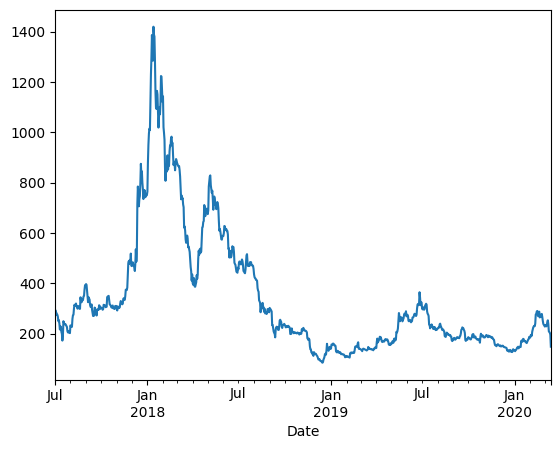

In [49]:
# Plot the resampled series of high per day
high_per_day.plot()

## Plotting

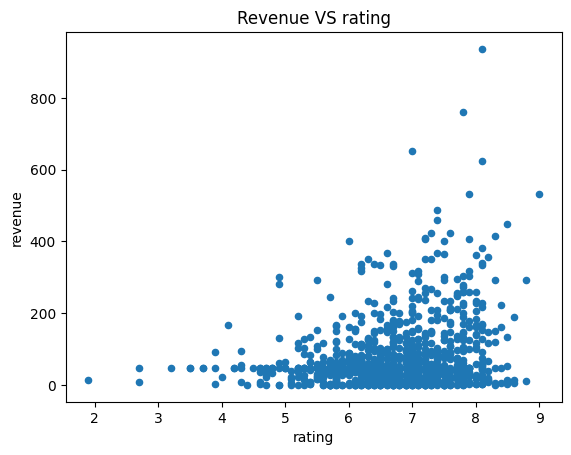

In [50]:
# Scatter plot of one column VS another
# (use a ; at the end to hide the matplotlib trace)
df.plot(kind='scatter', x='rating', y='revenue', title='Revenue VS rating');

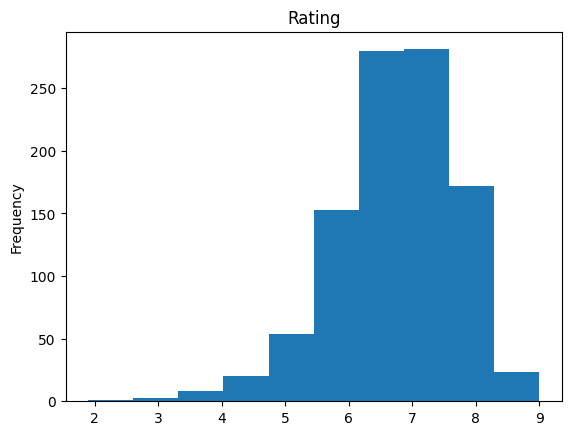

In [51]:
# Histogram for frequencies of one column
df['rating'].plot(kind='hist', title='Rating');

<Axes: xlabel='rating', ylabel='Count'>

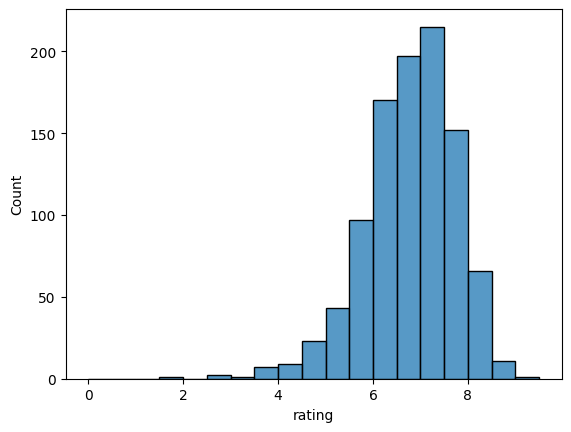

In [52]:
# similar plot using seaborn
import seaborn as sns
import numpy as np
sns.histplot(data=df, x='rating', bins=np.arange(0, 10, 0.5))

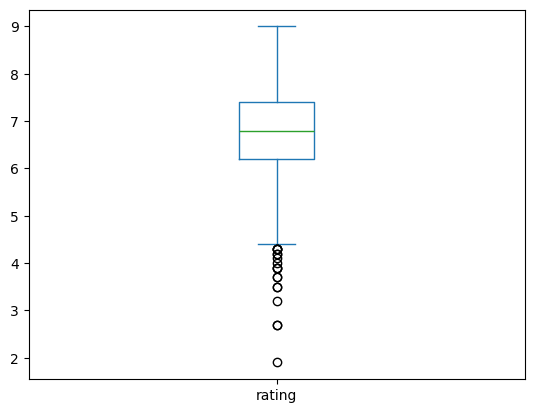

In [53]:
# box plot to show a column's distribution (similar to the result of "describe")
df['rating'].plot(kind='box');

<Axes: title={'center': 'revenue'}, xlabel='grade'>

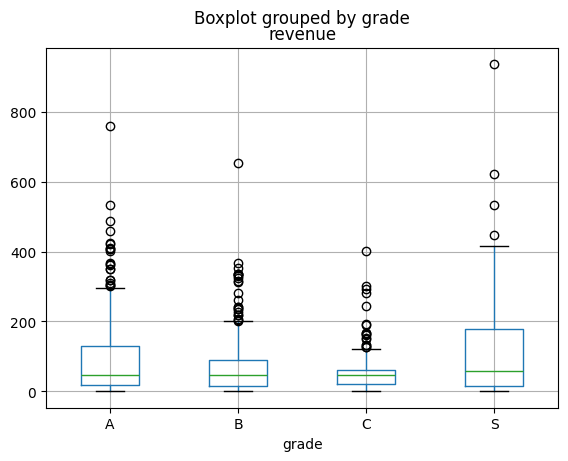

In [54]:
# box plot of a column split by another column
# now the plot is done at the dataframe level
df.boxplot(column='revenue', by='grade')

## Study of a sample dataset from StackOverflow survey

In [55]:
# explore dataset from stackoverflow
survey_df = pd.read_csv('data/stackoverflow/survey_results_public.csv', index_col='Respondent')
schema_df = pd.read_csv('data/stackoverflow/survey_results_schema.csv', index_col='Column')
schema_df.sort_index(inplace=True)

In [56]:
# Questions asked in the survey
schema_df.head(3)

,QuestionText
Column,
Age,What is your age (in years)? If you prefer not...
Age1stCode,At what age did you write your first line of c...
BetterLife,Do you think people born today will have a bet...


In [57]:
# Responses to the survey
survey_df.head(3)

,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
Respondent,,,,,,,,,,,,,,,,,,,,,
1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,"Taught yourself a new language, framework, or ...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,Taken an online course in programming or softw...,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor‚Äôs degree (BA, BS, B.Eng., etc.)",Web development or web design,"Taught yourself a new language, framework, or ...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult


In [58]:
# Several infos on the data
survey_df.info()
survey_df.describe()
survey_df.corr(numeric_only=True)
survey_df.shape

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 1 to 25
Data columns (total 84 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   MainBranch              25 non-null     object 
 1   Hobbyist                25 non-null     object 
 2   OpenSourcer             25 non-null     object 
 3   OpenSource              25 non-null     object 
 4   Employment              23 non-null     object 
 5   Country                 25 non-null     object 
 6   Student                 23 non-null     object 
 7   EdLevel                 24 non-null     object 
 8   UndergradMajor          16 non-null     object 
 9   EduOther                24 non-null     object 
 10  OrgSize                 17 non-null     object 
 11  DevType                 22 non-null     object 
 12  YearsCode               24 non-null     float64
 13  Age1stCode              25 non-null     int64  
 14  YearsCodePro            18 non-null     object 
 

(25, 84)

In [59]:
# Set the max number of rows/columns displayed
pd.set_option('display.max_columns', 85)
pd.set_option('display.max_rows', 85)

pd.get_option('display.max_columns')

85

<Axes: xlabel='Hobbyist'>

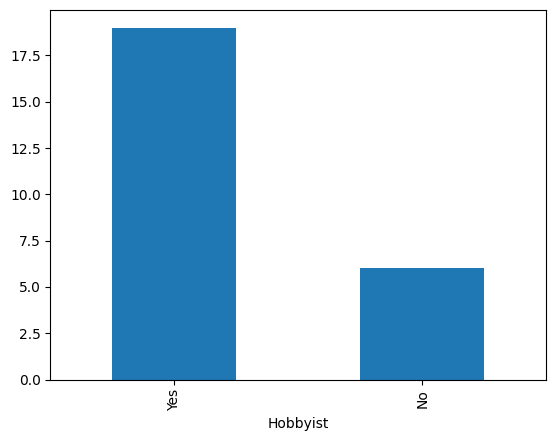

In [60]:
# Simple analysis of a Yes/No column
survey_df['Hobbyist']                                  # Vector of Yes/No response
survey_df['Hobbyist'].value_counts()                   # Series of count for each value
survey_df['Hobbyist'].value_counts().plot(kind='bar')  # Bar plot for the count of Yes/No

In [61]:
# Series of the responses of the first respondent (first row)
survey_df.iloc[0]

MainBranch                           I am a student who is learning to code
Hobbyist                                                                Yes
OpenSourcer                                                           Never
OpenSource                The quality of OSS and closed source software ...
Employment                           Not employed, and not looking for work
Country                                                      United Kingdom
Student                                                                  No
EdLevel                                           Primary/elementary school
UndergradMajor                                                          NaN
EduOther                  Taught yourself a new language, framework, or ...
OrgSize                                                                 NaN
DevType                                                                 NaN
YearsCode                                                               4.0
Age1stCode  

In [62]:
# People with salary above a threshold
high_salary_filter = survey_df['ConvertedComp'] > 100000
survey_df.loc[high_salary_filter, ['Country', 'LanguageWorkedWith', 'ConvertedComp']]

# People from a list of countries
countries = ['Japan', 'France']
country_filter = survey_df['Country'].isin(countries)
survey_df.loc[country_filter, ['Country', 'LanguageWorkedWith', 'ConvertedComp']]

# People knowing Python
# NOTE : We use string methods in the filter, with a default to FALSE for N/A values
python_filter = survey_df['LanguageWorkedWith'].str.lower().str.contains('python', na=False)
survey_df.loc[python_filter, ['Country', 'LanguageWorkedWith', 'ConvertedComp']]

,Country,LanguageWorkedWith,ConvertedComp
Respondent,,,
1,United Kingdom,HTML/CSS;Java;JavaScript;Python,NaN
2,Bosnia and Herzegovina,C++;HTML/CSS;Python,NaN
4,United States,C;C++;C#;Python;SQL,61000.0
5,Ukraine,C++;HTML/CSS;Java;JavaScript;Python;SQL;VBA,NaN
8,India,Bash/Shell/PowerShell;C;C++;HTML/CSS;Java;Java...,NaN
9,New Zealand,Bash/Shell/PowerShell;C#;HTML/CSS;JavaScript;P...,95179.0
10,India,C#;Go;JavaScript;Python;R;SQL,13293.0
12,Canada,Bash/Shell/PowerShell;HTML/CSS;Java;Python;R;SQL,NaN
18,Russian Federation,Python;R,21996.0


In [63]:
# Modify the value of a column for several rows in the dataframe
us_filter = survey_df['Country'] == 'United States'
survey_df.loc[us_filter, 'Country'] = 'USA'

In [64]:
not_null_filter = survey_df['ConvertedComp'].notnull()
survey_df.loc[not_null_filter].describe()

,YearsCode,Age1stCode,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
count,16.000000,16.000000,16.000000,16.000000,16.000000,9.000000,14.000000
mean,10.125000,16.375000,109040.625000,94466.812500,47.812500,4.722222,28.428571
std,8.245201,3.364025,228647.727023,128254.298952,29.873553,3.527668,7.013331
min,2.000000,11.000000,3000.000000,6300.000000,8.000000,0.500000,22.000000
25%,3.000000,14.500000,9125.000000,25290.000000,40.000000,3.000000,23.000000
50%,10.000000,16.500000,50500.000000,59030.000000,40.000000,4.000000,28.000000
75%,13.000000,18.250000,93250.000000,91294.750000,46.250000,5.000000,30.500000
max,35.000000,22.000000,950000.000000,455352.000000,140.000000,12.000000,47.000000


In [65]:
# What social medias are most popular ?
survey_df['SocialMedia'].value_counts(normalize=True)

SocialMedia
YouTube                     0.333333
Reddit                      0.250000
Twitter                     0.125000
Instagram                   0.083333
Facebook                    0.083333
VK –í–ö–æ–Ω—Ç–∞ÃÅ–∫—Ç–µ     0.041667
WhatsApp                    0.041667
I don't use social media    0.041667
Name: proportion, dtype: float64

### Social media analysis grouped by country

In [66]:
country_grp = survey_df.groupby(by='Country')
survey_df

# Value count of a column for a given group of the groupby
country_grp['SocialMedia'].get_group('USA').value_counts()

# Value count of a column for each country
country_grp['SocialMedia'].value_counts()

Country                 SocialMedia             
Australia               YouTube                     1
Bosnia and Herzegovina  Instagram                   1
Brazil                  WhatsApp                    1
Canada                  YouTube                     1
                        Reddit                      1
                        I don't use social media    1
Germany                 Reddit                      1
India                   YouTube                     3
Israel                  Reddit                      1
Lithuania               Facebook                    1
New Zealand             Twitter                     1
Russian Federation      VK –í–ö–æ–Ω—Ç–∞ÃÅ–∫—Ç–µ     1
South Africa            YouTube                     1
Thailand                Reddit                      1
USA                     Reddit                      2
                        Twitter                     1
                        Instagram                   1
Ukraine                 YouTube  

In [67]:
# Median of salary per country
country_grp['ConvertedComp'].median().sort_values(ascending=False)

Country
United Kingdom            455352.0
Canada                    366420.0
New Zealand                95179.0
USA                        79500.0
Australia                  65277.0
Germany                    57060.0
Lithuania                  41244.0
Brazil                     31140.0
Israel                     26388.0
Russian Federation         21996.0
India                      13293.0
Thailand                    8820.0
South Africa                6300.0
Antigua and Barbuda            NaN
Bosnia and Herzegovina         NaN
Ukraine                        NaN
Name: ConvertedComp, dtype: float64

In [68]:
# For each country, how many respondents know Python ?
country_grp['LanguageWorkedWith'].apply(lambda series: series.str.lower().str.contains('python').sum())

Country
Antigua and Barbuda       0
Australia                 0
Bosnia and Herzegovina    1
Brazil                    0
Canada                    2
Germany                   0
India                     2
Israel                    0
Lithuania                 1
New Zealand               1
Russian Federation        1
South Africa              0
Thailand                  0
USA                       3
Ukraine                   1
United Kingdom            1
Name: LanguageWorkedWith, dtype: int64

In [69]:
# Create a new DF with number of respondents and how many of them know Python per country

# Create the column Series for total nb of respondents and nb of respondents who know Python
respondent_nb  = survey_df['Country'].value_counts()
know_python_nb = country_grp['LanguageWorkedWith'].apply(lambda x: x.str.contains('Python').sum())

# Make a new df from it and rename the columns
new_df = pd.concat([respondent_nb, know_python_nb], axis='columns', sort=False)
new_df.rename(columns={'LanguageWorkedWith': 'KnowPython'}, inplace=True)

# Create a new column calculated from the 2 others
new_df['KnowPythonPct'] = 100 * new_df['KnowPython'] / new_df['count']
new_df

,count,KnowPython,KnowPythonPct
Country,,,
USA,4,3,75.000000
Canada,3,2,66.666667
India,3,2,66.666667
United Kingdom,2,1,50.000000
Ukraine,2,1,50.000000
Bosnia and Herzegovina,1,1,100.000000
Thailand,1,0,0.000000
New Zealand,1,1,100.000000
Antigua and Barbuda,1,0,0.000000


In [70]:
# Find the average nb of years of experience of respondents

# Some values are string, we need to convert them to float before we cast to float
survey_df['YearsCode'].unique()    # to see the different values
survey_df['YearsCode'].replace({'Less than 1 year': 0, 'More than 50 years': 51}, inplace=True)

# Convert the column to float
survey_df['YearsCode'] = survey_df['YearsCode'].astype(float)

survey_df['YearsCode'].mean()

8.791666666666666